# Ames Housing Prices

### Comparison of the Decision Tree and Random Forest Models utilizing Ames Housing Prices Data

#### Data available at: https://www.kaggle.com/marcopale/housing?select=AmesHousing.csv

In [2]:
# Pulling Python libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AmesHousing.csv')

## Exploratory Analysis

In [3]:
len(df.index)

2930

In [4]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [6]:
df.columns

Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
      

In [7]:
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# Checking missing values

missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

Lot_Frontage       490
Alley             2732
Mas_Vnr_Type        23
Mas_Vnr_Area        23
Bsmt_Qual           80
Bsmt_Cond           80
Bsmt_Exposure       83
BsmtFin_Type_1      80
BsmtFin_SF_1         1
BsmtFin_Type_2      81
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Electrical           1
Bsmt_Full_Bath       2
Bsmt_Half_Bath       2
Fireplace_Qu      1422
Garage_Type        157
Garage_Yr_Blt      159
Garage_Finish      159
Garage_Cars          1
Garage_Area          1
Garage_Qual        159
Garage_Cond        159
Pool_QC           2917
Fence             2358
Misc_Feature      2824
dtype: int64


<AxesSubplot:>

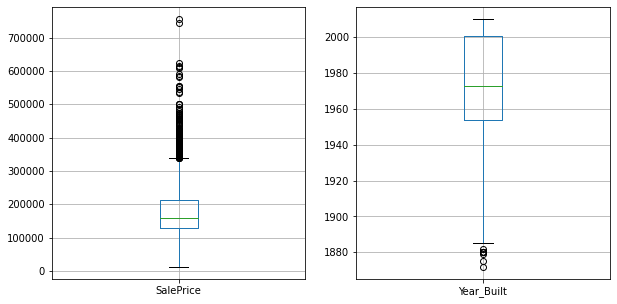

In [10]:
# Creating boxplots to see outliers and distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot(column= ["SalePrice"], ax=ax[0])
df.boxplot(column= ["Year_Built"], ax=ax[1])

<AxesSubplot:>

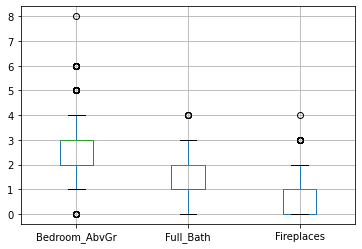

In [11]:
df.boxplot(column=["Bedroom_AbvGr", "Full_Bath", "Fireplaces"])

<AxesSubplot:>

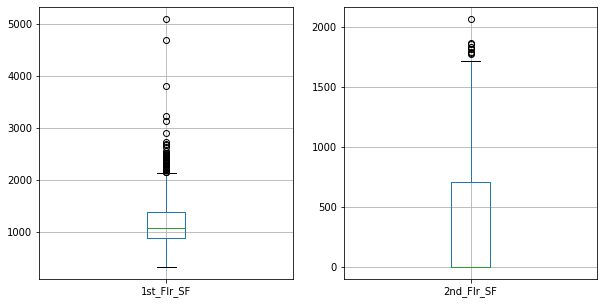

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot(column= ["1st_Flr_SF"], ax=ax[0])
df.boxplot(column= ["2nd_Flr_SF"], ax=ax[1])

<AxesSubplot:>

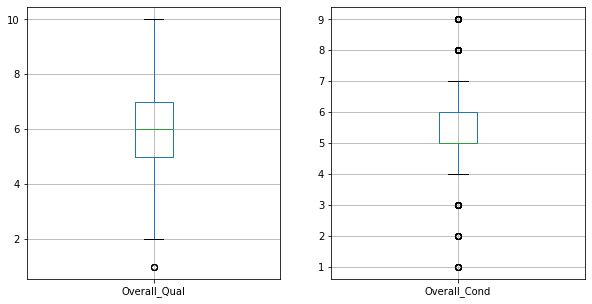

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot(column= ['Overall_Qual'], ax=ax[0])
df.boxplot(column= ['Overall_Cond'], ax=ax[1])

<AxesSubplot:>

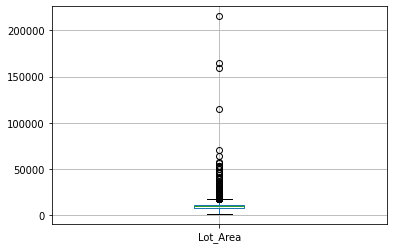

In [14]:
df.boxplot(column=["Lot_Area"])

## Defining the target and features

In [15]:
y = df.SalePrice

In [16]:
print(y)

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64


In [17]:
# Creating the list of features
feature_names = ['Fireplaces','Overall_Cond', 'Lot_Area','Year_Built', '1st_Flr_SF', 
    '2nd_Flr_SF', 'Full_Bath', 'Bedroom_AbvGr', 'Overall_Qual']

# Selecting data corresponding to features in feature_names
X = df[feature_names]

X.head()

,Fireplaces,Overall_Cond,Lot_Area,Year_Built,1st_Flr_SF,2nd_Flr_SF,Full_Bath,Bedroom_AbvGr,Overall_Qual
0,2,5,31770,1960,1656,0,1,3,6
1,0,6,11622,1961,896,0,1,2,5
2,0,6,14267,1958,1329,0,1,3,6
3,2,5,11160,1968,2110,0,2,3,7
4,1,5,13830,1997,928,701,2,3,5


In [18]:
X.describe()

,Fireplaces,Overall_Cond,Lot_Area,Year_Built,1st_Flr_SF,2nd_Flr_SF,Full_Bath,Bedroom_AbvGr,Overall_Qual
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.599317,5.563140,10147.921843,1971.356314,1159.557679,335.455973,1.566553,2.854266,6.094881
std,0.647921,1.111537,7880.017759,30.245361,391.890885,428.395715,0.552941,0.827731,1.411026
min,0.000000,1.000000,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,7440.250000,1954.000000,876.250000,0.000000,1.000000,2.000000,5.000000
50%,1.000000,5.000000,9436.500000,1973.000000,1084.000000,0.000000,2.000000,3.000000,6.000000
75%,1.000000,6.000000,11555.250000,2001.000000,1384.000000,703.750000,2.000000,3.000000,7.000000
max,4.000000,9.000000,215245.000000,2010.000000,5095.000000,2065.000000,4.000000,8.000000,10.000000


# Splitting data into train and validation data

In [19]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [20]:
len(train_X.index)

2197

In [21]:
len(val_X.index)

733

## Decision Tree: Specifying and fitting the model

In [22]:
# Using a utility fuction to help compare MAE scores 
# from diffrrent values for max_leaf_nodes

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y): 
    ames_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    ames_model.fit(train_X, train_y)
    predic_val = ames_model.predict(val_X)
    mae = mean_absolute_error(val_y, predic_val)
    return(mae)

## Decision Tree: Finding the ideal tree size & Calculating MAE

In [23]:
# Writing a loop to find the ideal tree size from candidate_max_leaf_nodes
candidate_max_leaf_nodes = [250, 300, 325, 350, 500, 550, 600]

for leaf_size in candidate_max_leaf_nodes:
        print("Max leaf nodes:", leaf_size, "    ", get_mae(leaf_size, train_X, val_X, train_y, val_y))

Max leaf nodes: 250      23058.12401227185
Max leaf nodes: 300      22826.151173675593
Max leaf nodes: 325      22772.961590200102
Max leaf nodes: 350      22707.60274679008
Max leaf nodes: 500      23033.978473448275
Max leaf nodes: 550      23333.833438061483
Max leaf nodes: 600      23389.553871185624


In [24]:
# Final Model 

best_leaf_node = 350
final_model = DecisionTreeRegressor(max_leaf_nodes= best_leaf_node, random_state=1)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=350, random_state=1)

## Random Forest: Specifying and fitting the model

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

## Random Forest: Calculating MAE on the validation data

In [26]:
predic_val = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, predic_val)

print(rf_val_mae)

19092.483866562725


#### Conclusion: Random forest model provided lower MAE (19,092) than the Decision Tree Model did (MAE=  22,707).